In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# GRIDWORLD

Gridworlds are tabular environments that are used for testing reinforcement learning algorithms. An agent typically has four movements available to it and needs to determine the best strategy to maximize its reward. There can be walls, obsticals, pits, special tiles, whatever you want in the environment.

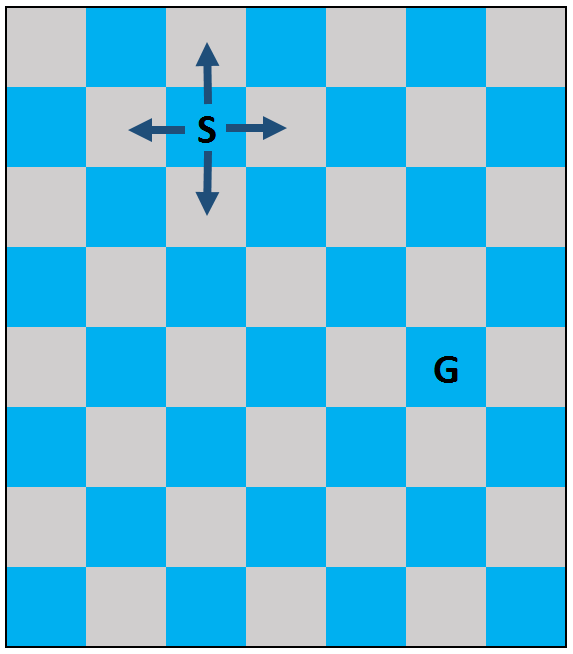

In [16]:
class gridworld:
    
    def __init__(self):
        self.dim = [5, 5]
        self.pos_A = [0, 1]
        self.rew_A = 10
        self.trans_A = [4, 1]
        self.pos_B = [0, 3]
        self.rew_B = 15
        self.trans_B = [2, 3]
        # Define starting position
        self.start = [4,0]
        self.s = self.start[:]
        self.reward = 0
            
        # Step count
        self.n = 0
        self.action_space = ["U", "L", "D", "R"]
        self.action_prob = [0.25, 0.25, 0.25, 0.25]
    
    # Show empty environment
    def show_grid(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            for j in range(self.dim[1]):
                if i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                elif i == self.pos_B[0] and j == self.pos_B[1]:
                    row.append("| B ")
                elif i == self.trans_A[0] and j == self.trans_A[1]:
                    row.append("| A'")
                elif i == self.trans_B[0] and j == self.trans_B[1]:
                    row.append("| B'")
                elif i == self.start[0] and j == self.start[1]:
                    row.append("| S ")
                else:
                    row.append("|   ")
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))
        
    # Show state
    def show_state(self):
        # print rows
        for i in range(self.dim[0]):
            print("-" * (self.dim[0] * 5 + 1))
            row = []
            for j in range(self.dim[1]):
                if i == self.s[0] and j == self.s[1]:
                    row.append("| X ")
                elif i == self.pos_A[0] and j == self.pos_A[1]:
                    row.append("| A ")
                elif i == self.pos_B[0] and j == self.pos_B[1]:
                    row.append("| B ")
                elif i == self.trans_A[0] and j == self.trans_A[1]:
                    row.append("| A'")
                elif i == self.trans_B[0] and j == self.trans_B[1]:
                    row.append("| B'")
                else:
                    row.append("|   ")
            row.append("|  ")
            print(' '.join(row))
        print("-" * (self.dim[0] * 5 + 1))
        
    # Give the agent an action
    def action(self, a):
        if a not in self.action_space:
            return "Error: Invalid action submission"
        # Check for special transition states
        if self.s == self.pos_A:
            self.s = self.trans_A[:]
            self.reward = self.rew_A
        elif self.s == self.pos_B:
            self.s = self.trans_B[:]
            self.reward = self.rew_B
        # Move up
        elif a == "U" and self.s[0] > 0:
            self.s[0] -= 1
            self.reward = 0
        # Move left
        elif a == "L" and self.s[1] > 0:
            self.s[1] -= 1
            self.reward = 0
        # Move down
        elif a == "D" and self.s[0] < self.dim[0] - 1:
            self.s[0] += 1
            self.reward = 0
        # Move right
        elif a == "R" and self.s[1] < self.dim[1] - 1:
            self.s[1] += 1
            self.reward = 0
        else:
            self.reward = -1
        self.n += 1
        return self.s, self.reward
            
    def reset(self):
        self.s = self.start
        self.reward = 0
        self.n = 0

We can view the environment with the show_grid() method or use the show_state() method to see where the agent is.

In [17]:
grid = gridworld()
grid.show_grid()

--------------------------
|    | A  |    | B  |    |  
--------------------------
|    |    |    |    |    |  
--------------------------
|    |    |    | B' |    |  
--------------------------
|    |    |    |    |    |  
--------------------------
| S  | A' |    |    |    |  
--------------------------


Calculate value function of each state

In [18]:
v = np.zeros(grid.dim)
gamma = 0.96
delta = 1e-5
delta_t = 1

while delta_t > delta:
    v_new = np.zeros(grid.dim)
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for action in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(action)
                prob = grid.action_prob[grid.action_space.index(action)]
                v_new[i, j] += prob * (r + gamma * v[s[0], s[1]])
    delta_t = np.sum(np.abs(v - v_new))
    v = v_new.copy()
    
print(v.round(1))

[[ 5.5 10.1 11.4 19.6 11.6]
 [ 4.   5.9  7.4  9.5  7.6]
 [ 2.1  3.3  4.2  4.8  4.1]
 [ 0.6  1.4  2.   2.1  1.7]
 [-0.7  0.1  0.5  0.5  0. ]]


In [19]:
q = np.zeros((grid.dim[0], grid.dim[1], len(grid.action_space)))
delta_t = 1

while delta_t > delta:
    q_old = q.copy()
    for i in range(grid.dim[0]):
        for j in range(grid.dim[1]):
            for a in grid.action_space:
                grid.s = [i, j]
                s, r = grid.action(a)
                a_index = grid.action_space.index(a)
                q[i, j, a_index] = r + gamma * np.max(q_old[s[0], s[1]])
    delta_t = np.sum(np.abs(q - q_old))
    
print(np.max(q, axis=2).round(1))

[[106.1 107.8 124.9 130.1 124.9]
 [110.5 115.1 119.9 124.9 119.9]
 [106.1 110.5 115.1 119.9 115.1]
 [101.9 106.1 110.5 115.1 110.5]
 [ 97.8 101.9 106.1 110.5 106.1]]


# Optimal Policy

In [20]:
def opt_policy(q, grid):
    q_max = np.max(q, axis=2)
    x = np.linspace(0, grid.dim[0] - 1, grid.dim[0]) + 0.5
    y = np.linspace(grid.dim[1] - 1, 0, grid.dim[1]) + 0.5
    X, Y = np.meshgrid(x, y)
    zeros = np.zeros((grid.dim))
    
    fig = plt.figure(figsize=(12,8))
    ax = plt.axes()
    
    for i, action in enumerate(grid.action_space):
        q_star = np.zeros((5, 5))
        for j in range(grid.dim[0]):
            for k in reversed(range(grid.dim[1])):
                if q[j, k, i] == q_max[j, k]:
                    q_star[j, k] = 0.4
        # Plot results
        if action == "U":
            # Vectors point in positive Y-direction
            plt.quiver(X, Y, zeros, q_star, scale=1, units='xy')
        elif action == "L":
            # Vectors point in negative X-direction
            plt.quiver(X, Y, -q_star, zeros, scale=1, units='xy')
        elif action == "D":
            # Vectors point in negative Y-direction
            plt.quiver(X, Y, zeros, -q_star, scale=1, units='xy')
        elif action == "R":
            # Vectors point in positive X-direction
            plt.quiver(X, Y, q_star, zeros, scale=1, units='xy')
        
    plt.xlim([0, grid.dim[0]])
    plt.ylim([0, grid.dim[1]])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.grid()
    plt.show()

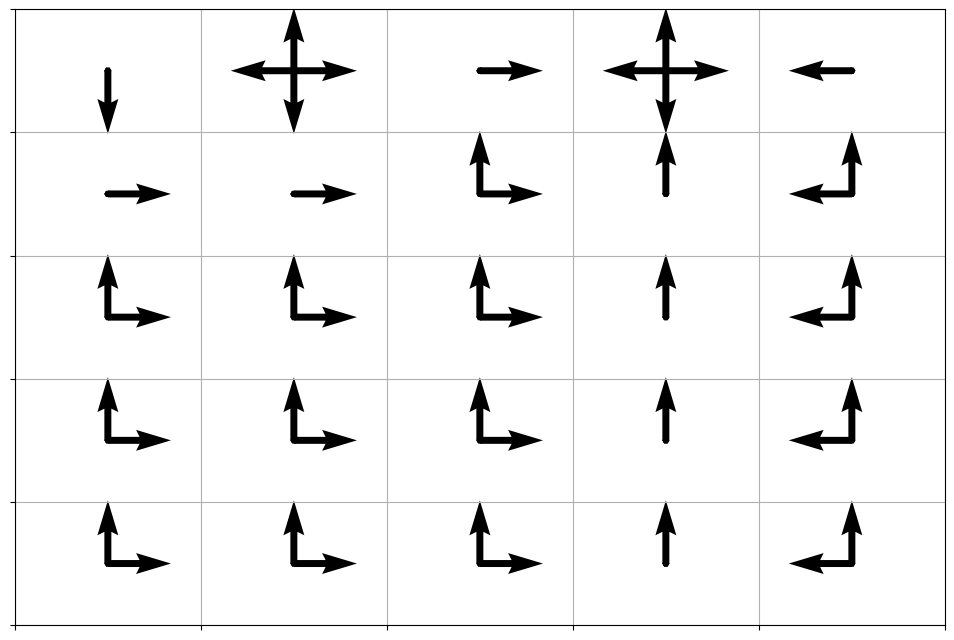

In [21]:
opt_policy(q, grid)

from https://www.datahubbs.com/reinforcement-learning-markov-decision-processes/